In [74]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics 
import sklearn.tree as tree

## 1. Arbres de décisions

In [65]:
spam = pd.read_csv("/users/2024/ds2/118004830/Téléchargements/spam7.csv", sep=";")

#spam.head(15)

In [66]:
X = spam.drop(columns=["yesno"])  
Y = spam["yesno"]  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [67]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.8534201954397395


In [68]:
#y_pred

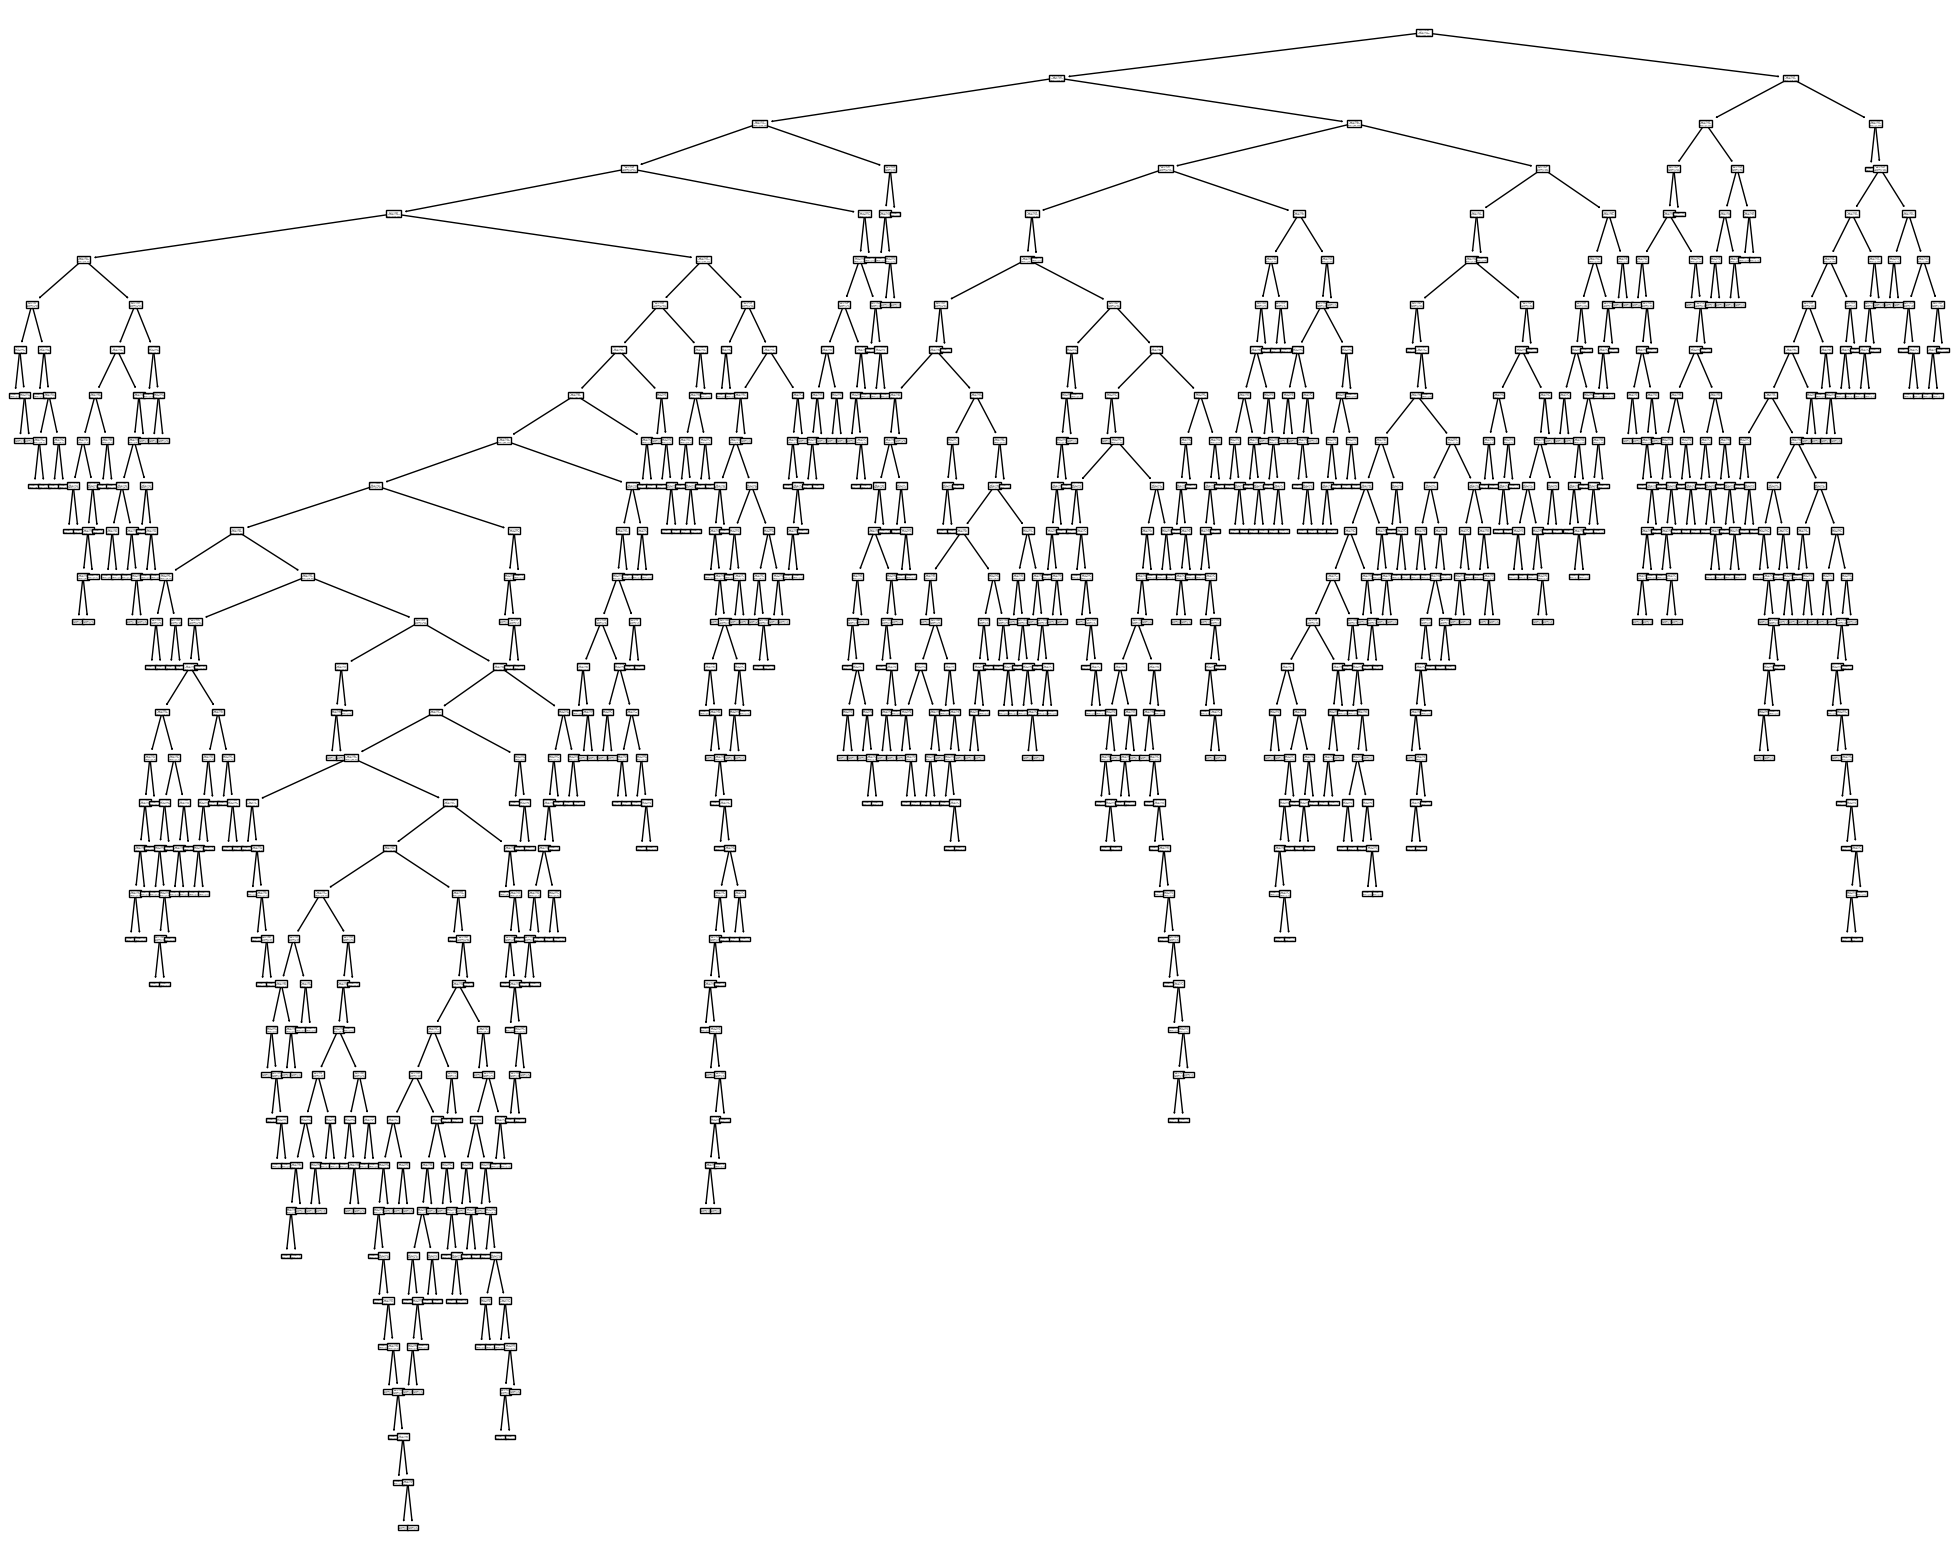

In [69]:
fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(clf)

Meilleurs paramètres : {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2}
Meilleure précision : 0.8698369565217391
Score de test: 0.8783930510314875


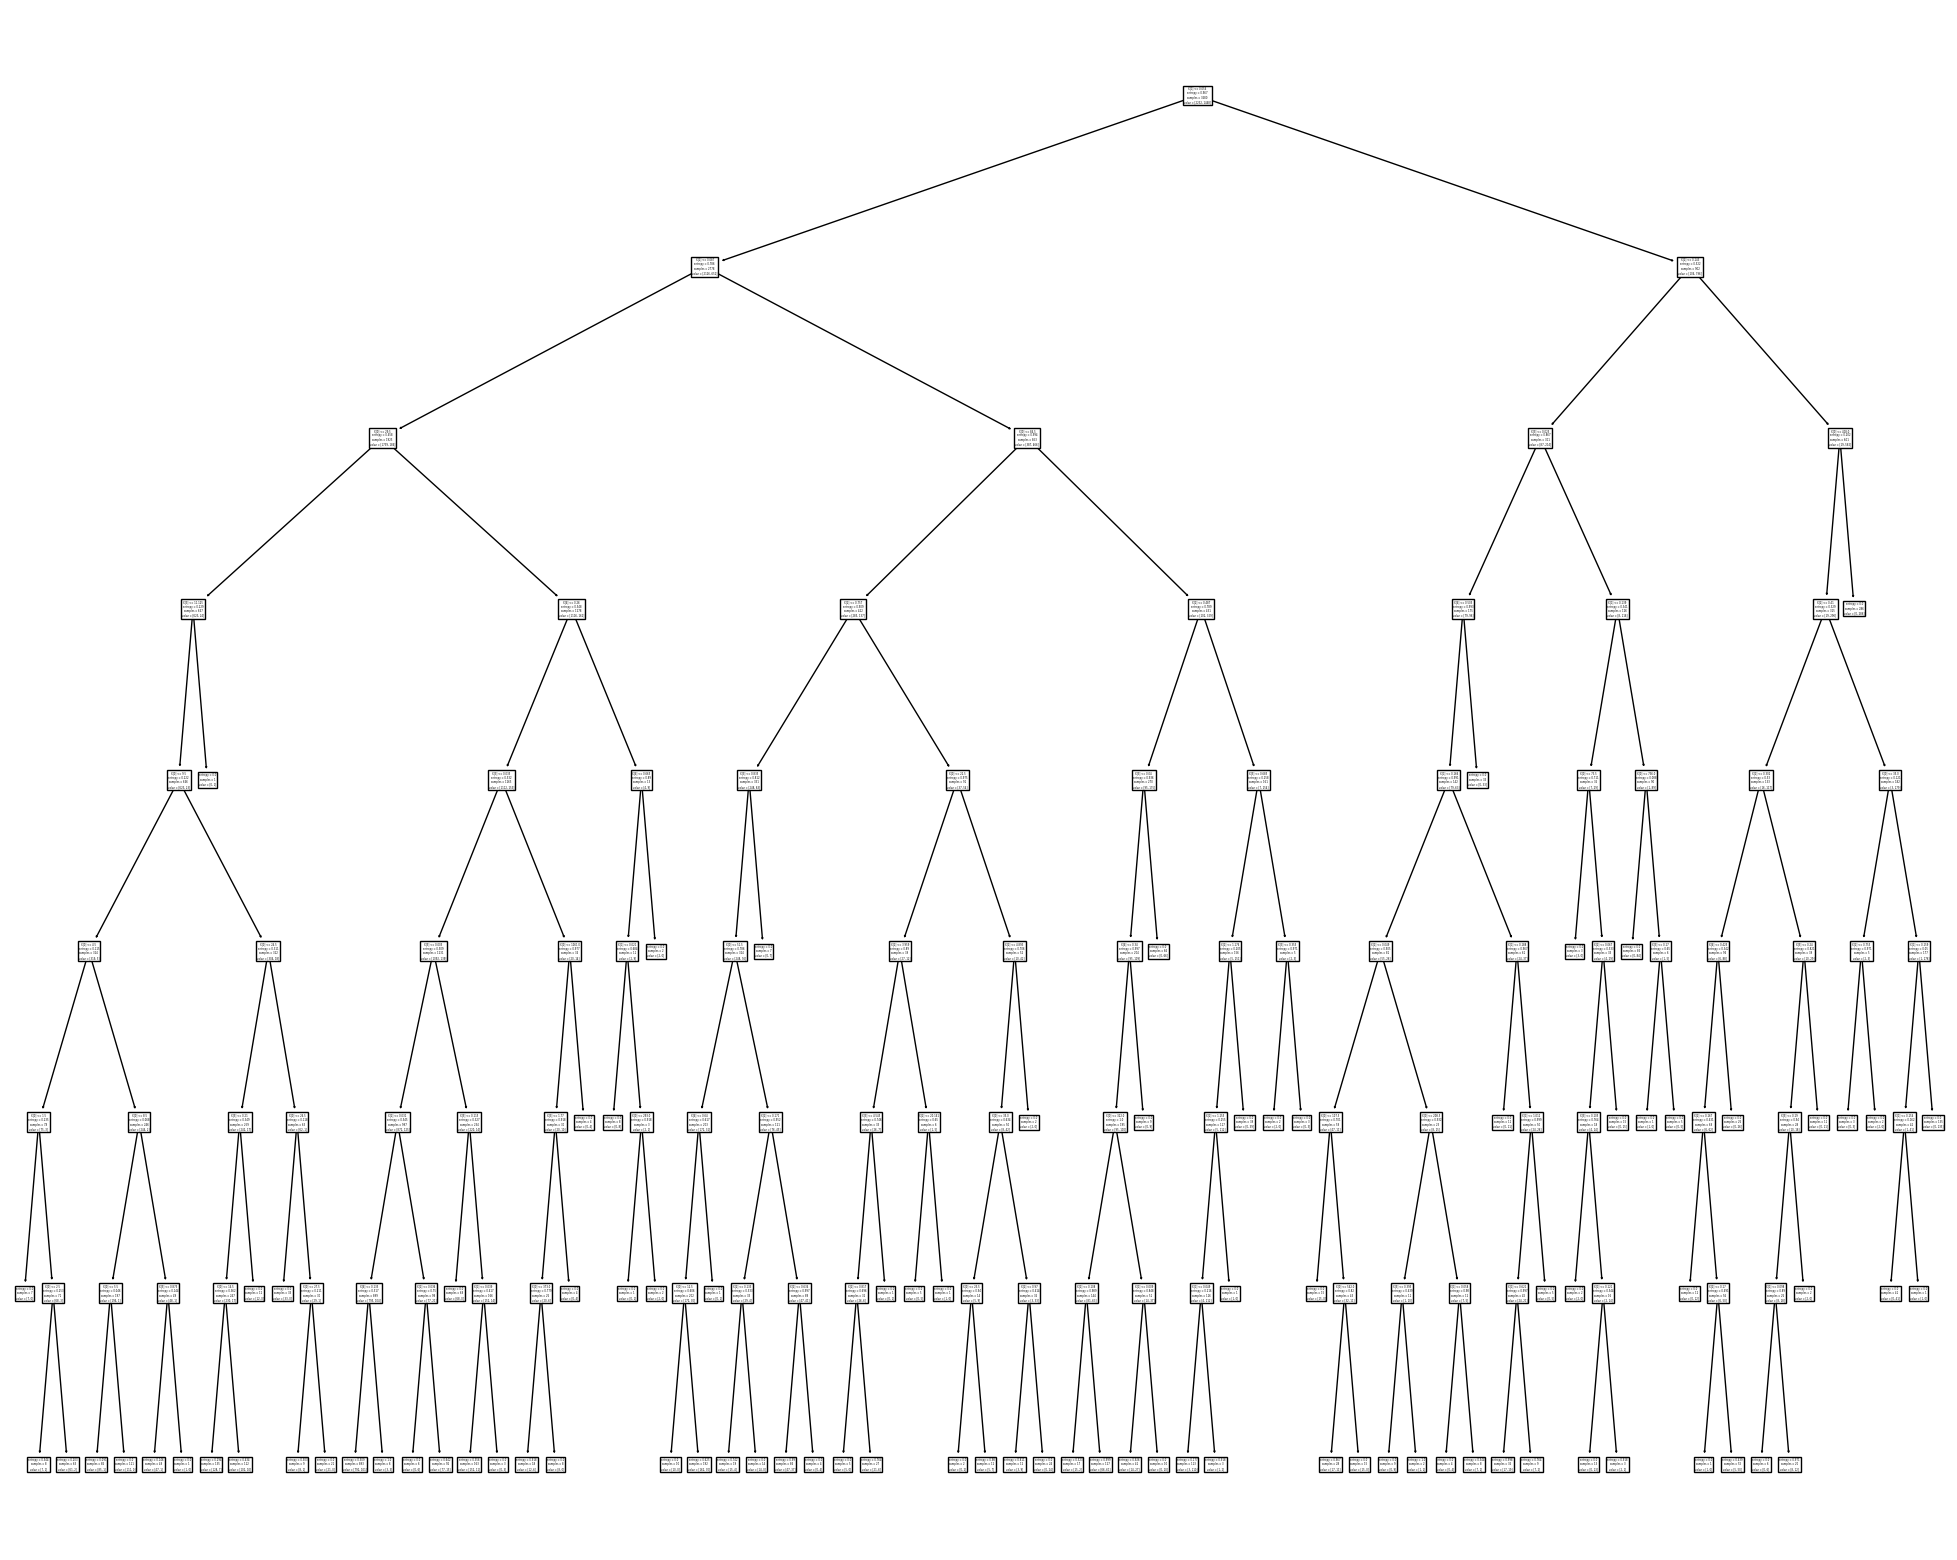

In [70]:
pgrid={'max_depth':range(1,10),
       "min_samples_split":[2,3,4,5,6,7,8,9,10],
       "criterion":["gini","entropy"],
       "ccp_alpha": [0,0.1,0.2,0.3]
      }

grid_search = GridSearchCV(DecisionTreeClassifier(), pgrid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_
print("Meilleurs paramètres :", best_params)
print("Meilleure précision :", best_score)

Y_pred = best_estimator.predict(X_test)
test_score = accuracy_score(Y_test, Y_pred)
print("Score de test:", test_score)



fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(best_estimator)

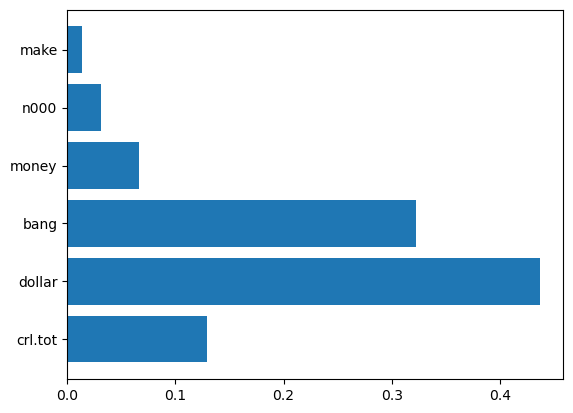

In [72]:
imp1 = best_estimator.feature_importances_
feat = X_train.columns.tolist()
plt.barh(feat, imp1)
plt.show()


## 2. Bagging

In [76]:
clf=BaggingClassifier()
clf.fit(X_train, Y_train.values.ravel())

BaggingClassifier()